In [1]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv('All-hati-7040x73.csv')

In [3]:
df.columns

Index(['SUBJEK', 'KATA', 'LABEL', 'AF3_THETA', 'AF3_ALPHA', 'AF3_LOW_BETA',
       'AF3_HIGH_BETA', 'AF3_GAMMA', 'F7_THETA', 'F7_ALPHA', 'F7_LOW_BETA',
       'F7_HIGH_BETA', 'F7_GAMMA', 'F3_THETA', 'F3_ALPHA', 'F3_LOW_BETA',
       'F3_HIGH_BETA', 'F3_GAMMA', 'FC5_THETA', 'FC5_ALPHA', 'FC5_LOW_BETA',
       'FC5_HIGH_BETA', 'FC5_GAMMA', 'T7_THETA', 'T7_ALPHA', 'T7_LOW_BETA',
       'T7_HIGH_BETA', 'T7_GAMMA', 'P7_THETA', 'P7_ALPHA', 'P7_LOW_BETA',
       'P7_HIGH_BETA', 'P7_GAMMA', 'O1_THETA', 'O1_ALPHA', 'O1_LOW_BETA',
       'O1_HIGH_BETA', 'O1_GAMMA', 'O2_THETA', 'O2_ALPHA', 'O2_LOW_BETA',
       'O2_HIGH_BETA', 'O2_GAMMA', 'P8_THETA', 'P8_ALPHA', 'P8_LOW_BETA',
       'P8_HIGH_BETA', 'P8_GAMMA', 'T8_THETA', 'T8_ALPHA', 'T8_LOW_BETA',
       'T8_HIGH_BETA', 'T8_GAMMA', 'FC6_THETA', 'FC6_ALPHA', 'FC6_LOW_BETA',
       'FC6_HIGH_BETA', 'FC6_GAMMA', 'F4_THETA', 'F4_ALPHA', 'F4_LOW_BETA',
       'F4_HIGH_BETA', 'F4_GAMMA', 'F8_THETA', 'F8_ALPHA', 'F8_LOW_BETA',
       'F8_HIGH_BETA', '

In [4]:
label = np.arange(0,40,5)
length = label.shape[0]

for x in range(0, length) :
    df['LABEL'] = df['LABEL'].replace(label[x],x)

In [5]:
df.shape

(7040, 73)

In [6]:
df.duplicated().value_counts()

False    7040
dtype: int64

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.isna().values.any()

False

In [9]:
X = df.drop(columns = ["SUBJEK", "KATA", "LABEL"])
y = df.LABEL

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5280, 70), (1760, 70), (5280,), (1760,))

In [10]:
XGB_pipeline = Pipeline([
    ("algo", XGBClassifier(use_label_encoder=False))
])

parameter = {
    "algo__n_estimators": [100,200],
    "algo__max_depth": [40,50,60],
}

In [11]:
model_XGB = GridSearchCV(XGB_pipeline, param_grid=parameter, cv=5, n_jobs=-1, verbose=1)
model_XGB.fit(X_train, y_train) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 51.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('algo',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      gamma=0,
                                                      learning_rate=0.1,
                                                      max_delta_step=0,
                                                      max_depth=3,
                                                      min_child_weight=1,
                                                      missing=None,
                                                      n_estimators=100,
 

In [12]:
pd.DataFrame(model_XGB.cv_results_).sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo__max_depth,param_algo__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,587.294654,46.733285,1.488986,0.539473,40,200,"{'algo__max_depth': 40, 'algo__n_estimators': ...",0.919736,0.926206,0.915720,0.927962,0.932574,0.924432,0.005995,1
3,1223.301600,192.703773,1.566901,0.609977,50,200,"{'algo__max_depth': 50, 'algo__n_estimators': ...",0.919736,0.926206,0.915720,0.927962,0.932574,0.924432,0.005995,1
5,925.403763,176.963981,1.071737,0.436432,60,200,"{'algo__max_depth': 60, 'algo__n_estimators': ...",0.919736,0.926206,0.915720,0.927962,0.932574,0.924432,0.005995,1
0,408.418253,20.425514,0.406176,0.131774,40,100,"{'algo__max_depth': 40, 'algo__n_estimators': ...",0.912181,0.921476,0.910038,0.923223,0.931624,0.919697,0.007841,4
2,430.355616,63.803159,0.718257,0.438150,50,100,"{'algo__max_depth': 50, 'algo__n_estimators': ...",0.912181,0.921476,0.910038,0.923223,0.931624,0.919697,0.007841,4


In [13]:
model_XGB

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('algo',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      gamma=0,
                                                      learning_rate=0.1,
                                                      max_delta_step=0,
                                                      max_depth=3,
                                                      min_child_weight=1,
                                                      missing=None,
                                                      n_estimators=100,
 

In [14]:
pd.DataFrame(model_XGB.cv_results_).sort_values("rank_test_score").all()

mean_fit_time               True
std_fit_time                True
mean_score_time             True
std_score_time              True
param_algo__max_depth       True
param_algo__n_estimators    True
params                      True
split0_test_score           True
split1_test_score           True
split2_test_score           True
split3_test_score           True
split4_test_score           True
mean_test_score             True
std_test_score              True
rank_test_score             True
dtype: bool

In [15]:
model_XGB.best_params_

{'algo__max_depth': 40, 'algo__n_estimators': 200}

In [16]:
model_XGB.score(X_train, y_train), model_XGB.score(X_test, y_test)

(1.0, 0.9585227272727272)

In [17]:
train_pred = model_XGB.predict(X_train)
train_perf = classification_report(train_pred, y_train)
print(train_perf)

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       661
           8       1.00      1.00      1.00       639
          13       1.00      1.00      1.00       671
          18       1.00      1.00      1.00       670
          23       1.00      1.00      1.00       688
          28       1.00      1.00      1.00       664
          33       1.00      1.00      1.00       645
          38       1.00      1.00      1.00       642

    accuracy                           1.00      5280
   macro avg       1.00      1.00      1.00      5280
weighted avg       1.00      1.00      1.00      5280



In [18]:
test_pred = model_XGB.predict(X_test)
test_perf = classification_report(test_pred, y_test)
print(test_perf)

              precision    recall  f1-score   support

           3       0.97      0.96      0.97       222
           8       0.95      0.98      0.97       235
          13       0.95      0.95      0.95       208
          18       0.93      0.94      0.94       208
          23       0.96      0.93      0.95       199
          28       0.96      0.99      0.97       210
          33       0.96      0.94      0.95       240
          38       0.97      0.97      0.97       238

    accuracy                           0.96      1760
   macro avg       0.96      0.96      0.96      1760
weighted avg       0.96      0.96      0.96      1760



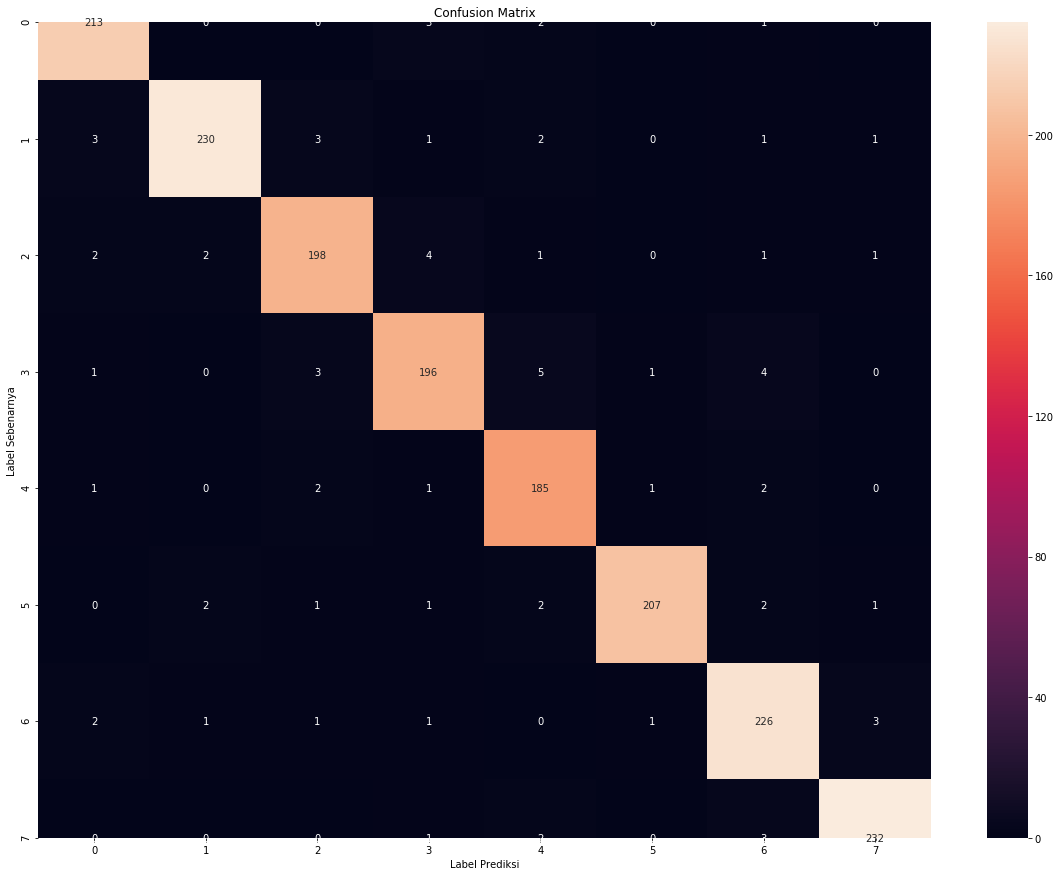

In [19]:
f, ax = plt.subplots(figsize=(20,15))
sns.heatmap(confusion_matrix(y_test, test_pred), annot=True, fmt=".0f", ax=ax)
plt.title("Confusion Matrix")
plt.xlabel("Label Prediksi")
plt.ylabel("Label Sebenarnya")
plt.show()

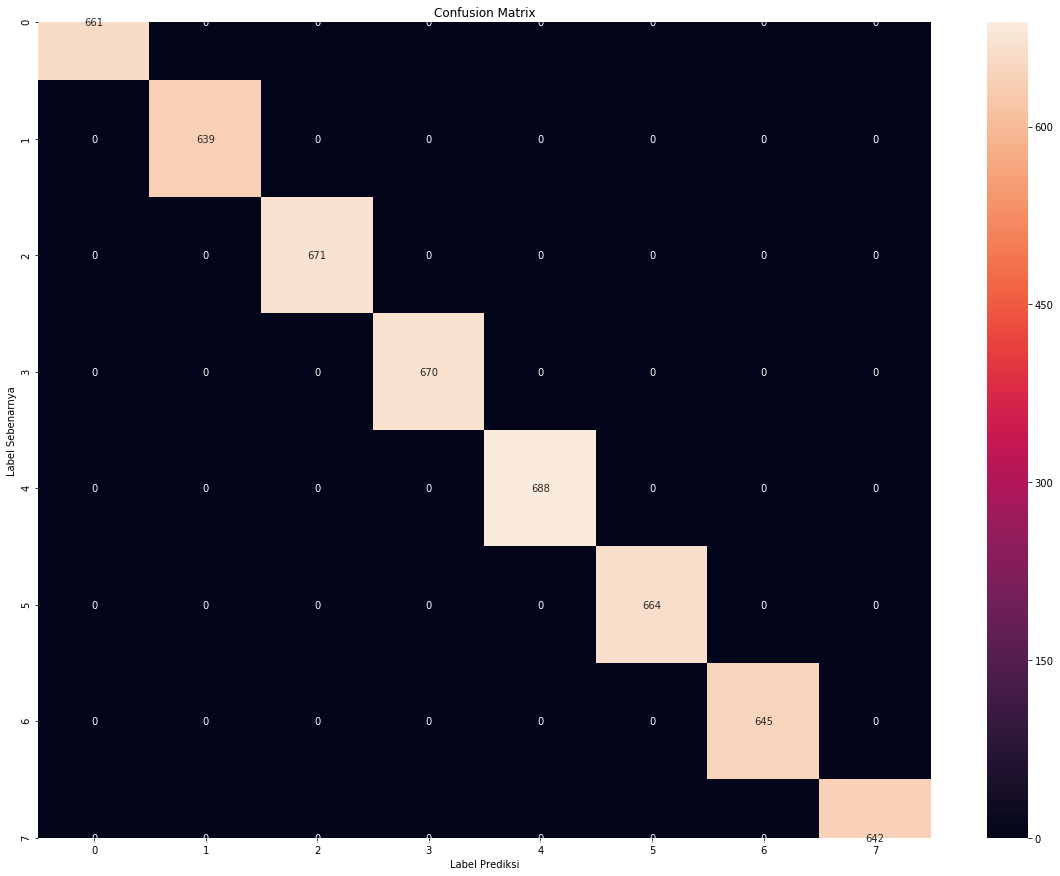

In [20]:
f, ax = plt.subplots(figsize=(20,15))
sns.heatmap(confusion_matrix(y_train, train_pred), annot=True, fmt=".0f", ax=ax)
plt.title("Confusion Matrix")
plt.xlabel("Label Prediksi")
plt.ylabel("Label Sebenarnya")
plt.show()

In [21]:
best_max_depth = model_XGB.best_params_["algo__max_depth"]
best_n_estimators = model_XGB.best_params_["algo__n_estimators"]

In [22]:
model_xgb = XGBClassifier(n_estimators= best_n_estimators, max_depth=best_max_depth, use_label_encoder=False)

In [23]:
model_xgb.fit(X_train,y_train)
model_importance = model_xgb.feature_importances_

In [24]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

df_model_importance = pd.DataFrame(model_importance)

Label = X_train.columns
df_model_importance['label'] = Label
df_model_importance
pd.DataFrame(df_model_importance).to_csv("model_importance.csv", index = None)

In [25]:
df_model_importance

,0,label
0,0.013631,AF3_THETA
1,0.016253,AF3_ALPHA
2,0.015373,AF3_LOW_BETA
3,0.015684,AF3_HIGH_BETA
4,0.015279,AF3_GAMMA
5,0.014149,F7_THETA
6,0.012984,F7_ALPHA
7,0.011663,F7_LOW_BETA
8,0.015407,F7_HIGH_BETA
9,0.014926,F7_GAMMA


In [26]:
urut = df_model_importance.sort_values(0, ascending=False)
urut

,0,label
12,0.017249,F3_LOW_BETA
40,0.017060,P8_THETA
44,0.016413,P8_GAMMA
61,0.016366,F8_ALPHA
1,0.016253,AF3_ALPHA
33,0.015901,O1_HIGH_BETA
13,0.015883,F3_HIGH_BETA
68,0.015788,AF4_HIGH_BETA
43,0.015743,P8_HIGH_BETA
23,0.015737,T7_HIGH_BETA


In [27]:
labels = df.drop(columns = ["SUBJEK", "KATA", "LABEL"]).columns

x = np.arange(len(labels))  # the label locations
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69])

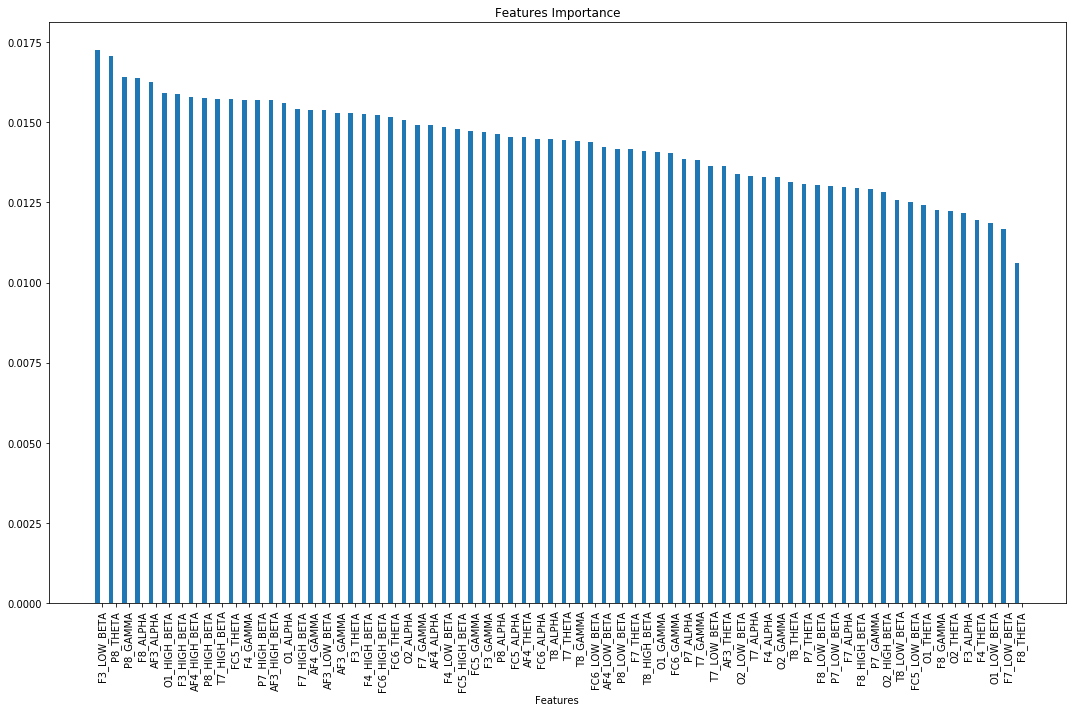

In [28]:
labels = df.drop(columns = ["SUBJEK", "KATA", "LABEL"]).columns


x = np.arange(len(urut))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,10))
rects1 = ax.bar(x - width, df_model_importance[0].sort_values(0, ascending=False), width)

ax.set_xlabel('Features')
ax.set_title('Features Importance')
ax.set_xticks(x)
ax.set_xticklabels(urut['label'], rotation='vertical')

fig.tight_layout()

plt.show()